# 1. Pré-processamento

## 1.1. Importação das bibliotecas

In [1]:
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Coleta de dados via API

Os dados foram extraídos da API do Banco Mundial. A consulta foi configurada para buscar dois indicadores:
* NY.GDP.PCAP.KD: PIB per capita
* TX.VAL.FUEL.ZS.UN: Exportações de combustíveis

Esta consulta foi aplicada aos 12 países sul-americanos selecionados, para o período de 2000 a 2022.

In [2]:
paises = ['BRA', 'ARG', 'BOL', 'CHL', 'COL', 'ECU', 'PRY', 'PER', 'URY', 'VEN', 'GUY', 'SUR']
periodo = range(2000, 2023)
indicadores = {
    "NY.GDP.PCAP.KD": "PIB per capita",
    "TX.VAL.FUEL.ZS.UN": "Exportações de combustíveis"
}

df_data = wb.data.DataFrame(
    list(indicadores.keys()), 
    paises, 
    time=periodo,
    labels=True
).reset_index()

display(df_data.head())

,economy,series,Country,Series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,SUR,NY.GDP.PCAP.KD,Suriname,GDP per capita (constant 2015 US$),6128.316024,6255.552742,6301.317310,6567.843099,7021.989199,7261.817135,...,9303.460088,9224.243784,8813.617054,8293.315530,8338.692354,8666.648707,8677.305220,7213.107667,6973.899419,7081.333573
1,GUY,NY.GDP.PCAP.KD,Guyana,GDP per capita (constant 2015 US$),3759.607897,3847.094619,3894.871074,3873.041237,3937.114353,3867.933082,...,5573.342179,5635.717041,5640.415606,5818.616822,5997.182714,6080.906121,6278.630541,9010.610005,10711.997337,17365.333643
2,VEN,NY.GDP.PCAP.KD,"Venezuela, RB",GDP per capita (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,URY,NY.GDP.PCAP.KD,Uruguay,GDP per capita (constant 2015 US$),11096.330957,10643.557402,9806.771306,9878.756843,10366.906738,11131.398489,...,16639.405475,17122.036456,17125.901680,17357.234999,17611.603670,17608.944120,17758.438437,16443.363500,17416.005221,18228.355844
4,PER,NY.GDP.PCAP.KD,Peru,GDP per capita (constant 2015 US$),3286.273085,3261.664251,3398.749914,3502.791657,3640.602999,3835.132193,...,6021.461428,6103.918647,6231.711503,6392.254749,6457.419403,6593.144375,6626.260835,5831.830248,6547.847182,6667.516956


## 1.3. Limpeza e Renomeação

1. Remoção das colunas economy e Series pois não serão utilizadas.
2. A coluna Country foi renomeada para país.
3. Substituição dos valores da coluna series pelos seus nomes completos.

In [3]:
df_data = df_data.drop(columns = ['economy', 'Series'])

df_data = df_data.rename(columns={"Country": "País"})

df_data['series'] = df_data['series'].map(indicadores)

display(df_data.head())

,series,País,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,PIB per capita,Suriname,6128.316024,6255.552742,6301.317310,6567.843099,7021.989199,7261.817135,7599.356969,7897.256489,...,9303.460088,9224.243784,8813.617054,8293.315530,8338.692354,8666.648707,8677.305220,7213.107667,6973.899419,7081.333573
1,PIB per capita,Guyana,3759.607897,3847.094619,3894.871074,3873.041237,3937.114353,3867.933082,4076.779817,4382.104497,...,5573.342179,5635.717041,5640.415606,5818.616822,5997.182714,6080.906121,6278.630541,9010.610005,10711.997337,17365.333643
2,PIB per capita,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PIB per capita,Uruguay,11096.330957,10643.557402,9806.771306,9878.756843,10366.906738,11131.398489,11574.470540,12310.482736,...,16639.405475,17122.036456,17125.901680,17357.234999,17611.603670,17608.944120,17758.438437,16443.363500,17416.005221,18228.355844
4,PIB per capita,Peru,3286.273085,3261.664251,3398.749914,3502.791657,3640.602999,3835.132193,4091.362686,4407.791217,...,6021.461428,6103.918647,6231.711503,6392.254749,6457.419403,6593.144375,6626.260835,5831.830248,6547.847182,6667.516956


## 1.4. Conversão do formato 'Wide' para 'Tidy'

Os dados da API são obtidos em um formato wide onde cada ano é uma coluna, o que torna inadequado para análises, precisamos converter para o formato tidy através de duas etapas:
* melt: Todas as colunas de ano serão armazenas em uma coluna só, chamada Ano e os valores que as antigas colunas armazenavam serão mantidas em uma nova coluna chamada Valores.
* pivot: Após o melt a coluna Valores conterá dados misturados de nossos indicadores, o pivot irá separar cada um deles em novas colunas e preenchê-las com os dados armazenados na coluna Valores.

In [4]:
df_data = df_data.melt(
    id_vars=['País', 'series'], # O que não será alterado
    var_name='Ano',
    value_name='Valores'
)

df_data = df_data.pivot(
    index=['País', 'Ano'], # O que não será alterado
    columns='series', # Cada um dos indicadores se tornará uma coluna
    values='Valores' # Essas novas colunas terão os valores que estão armazenados na coluna Valores
).reset_index()

display(df_data.head())

series,País,Ano,Exportações de combustíveis,PIB per capita
0,Argentina,YR2000,17.624183,10631.650364
1,Argentina,YR2001,17.027214,10051.944846
2,Argentina,YR2002,17.006238,8861.561993
3,Argentina,YR2003,17.083063,9545.531941
4,Argentina,YR2004,16.000290,10302.446532


## 1.5. Conversão de tipos e Ordenação

1. Após a pivotagem o nome residual 'Series' permaneceu na estrutura de colunas, iremos o remover para manter a tabela mais limpa.
2. A coluna Ano possui dados String, eliminaremos o prefixo 'YR' e converte-la para um inteiro. Isso é importante para ordenação e facilitar filtragem.
3. Ordenação do dataset por País e Ano, garantindo a integridade cronológica dos dados.

In [5]:
df_data.columns.name = None

df_data['Ano'] = df_data['Ano'].str.replace('YR', '').astype(int)

df_data = df_data.sort_values(by=['País', 'Ano']).reset_index()

display(df_data.head())

,index,País,Ano,Exportações de combustíveis,PIB per capita
0,0,Argentina,2000,17.624183,10631.650364
1,1,Argentina,2001,17.027214,10051.944846
2,2,Argentina,2002,17.006238,8861.561993
3,3,Argentina,2003,17.083063,9545.531941
4,4,Argentina,2004,16.000290,10302.446532


## 1.6. Tratamento de dados faltantes
Primeiramente identificamos quais linhas estão com dados faltantes e encontramos dois casos:
* Venezuela: 100% dos dados para o indicador PIB per capita da Venezuela estão ausentes, além disso, de 2014 a 2022 não temos nenhum dado de exportações de combustíveis, período esse que é de extrema importância, pois, em 2014 iniciou-se uma crise na Venezuela. Essa ausência se da ao fato de que o Banco Central da Venezuela não disponibiliza informações oficiais, que são a fonte de coleta para o Banco Mundial. Torna-se impossível realizar imputação ou análise para os nossos dois indicadores em específico e por conta disso excluiremos todas as entradas da Venezuela do dataset.
* Suriname: Esse país tem um único dado faltante em 2016 no indicador Exportações de combustíveis. Após analisar seus dados em outros anos, escolhemos realizar uma inputação por interpolação linear, o valor de 2016 será preenchido por uma tendência linear entre o valor de 2015 e 2017, mantendo a integridade temporal.

In [6]:
df_data[df_data.isna().any(axis=1)]

,index,País,Ano,Exportações de combustíveis,PIB per capita
223,223,Suriname,2016,NaN,8293.31553
253,253,"Venezuela, RB",2000,86.085759,NaN
254,254,"Venezuela, RB",2001,83.044564,NaN
255,255,"Venezuela, RB",2002,80.119154,NaN
256,256,"Venezuela, RB",2003,82.242711,NaN
257,257,"Venezuela, RB",2004,83.419834,NaN
258,258,"Venezuela, RB",2005,87.824789,NaN
259,259,"Venezuela, RB",2006,92.560389,NaN
260,260,"Venezuela, RB",2007,NaN,NaN
261,261,"Venezuela, RB",2008,93.742892,NaN


In [7]:
# Exclusão das entradas da Venezuela
df_data = df_data.dropna(subset=['PIB per capita'])

# Informação dos outros anos de Suriname
df_data[df_data['País'] == 'Suriname']

,index,País,Ano,Exportações de combustíveis,PIB per capita
207,207,Suriname,2000,0.528036,6128.316024
208,208,Suriname,2001,0.806964,6255.552742
209,209,Suriname,2002,2.351533,6301.317310
210,210,Suriname,2003,1.476684,6567.843099
211,211,Suriname,2004,2.110629,7021.989199
212,212,Suriname,2005,2.877446,7261.817135
213,213,Suriname,2006,4.734318,7599.356969
214,214,Suriname,2007,4.503580,7897.256489
215,215,Suriname,2008,10.990780,8129.114647
216,216,Suriname,2009,4.497439,8276.690798


In [8]:
# Realização da imputação por interpolação linear
df_data['Exportações de combustíveis'] = df_data.groupby('País')['Exportações de combustíveis'].transform(lambda x: x.interpolate(method='linear'))
df_data[df_data['País'] == 'Suriname']

,index,País,Ano,Exportações de combustíveis,PIB per capita
207,207,Suriname,2000,0.528036,6128.316024
208,208,Suriname,2001,0.806964,6255.552742
209,209,Suriname,2002,2.351533,6301.317310
210,210,Suriname,2003,1.476684,6567.843099
211,211,Suriname,2004,2.110629,7021.989199
212,212,Suriname,2005,2.877446,7261.817135
213,213,Suriname,2006,4.734318,7599.356969
214,214,Suriname,2007,4.503580,7897.256489
215,215,Suriname,2008,10.990780,8129.114647
216,216,Suriname,2009,4.497439,8276.690798


## 1.7. Verificação final

In [9]:
print("Contagem de dados faltantes:")
print(df_data.isna().sum())

duplicatas = df_data.duplicated(subset=['País', 'Ano']).sum()
print(f"\nNúmero de linhas duplicadas (País + Ano): {duplicatas}")

print(f"\nVerificação de tipos:")
display({df_data.info()})

Contagem de dados faltantes:
index                          0
País                           0
Ano                            0
Exportações de combustíveis    0
PIB per capita                 0
dtype: int64

Número de linhas duplicadas (País + Ano): 0

Verificação de tipos:
<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        253 non-null    int64  
 1   País                         253 non-null    object 
 2   Ano                          253 non-null    int64  
 3   Exportações de combustíveis  253 non-null    float64
 4   PIB per capita               253 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 11.9+ KB


{None}

# 2. Análise Exploratória dos Dados (EDA)
Com o dataset limpo e ordenado, iniciaremos a análise exploratória, com o objetivo de sintetizar através de estatísticas e visualizações simples os atributos do conjunto de dados: 
* Entender suas distribuições
* Identificar relações temporais
* Identificar correlações.

Ou seja, entender de forma profunda os dados que estamos utilizando.

## 2.1. Estatísticas Descritivas
Utilizando o .describe(), iremos analisar as estatísticas centrais do nosso dataset.

Nossa principal observação é a discrepância entre a média e a mediana (50%) em exportações de combustível, onde a média (19.1%) é mais que o dobro da mediana (8.9%). Isso nos indica que esses dados são assimétricos, ou seja, existem outliers que puxam a média para cima, tornando a mediana uma métrica mais confiável para representar o centro dos dados.

In [10]:
display(df_data.describe())

,index,Ano,Exportações de combustíveis,PIB per capita
count,253.000000,253.000000,253.000000,253.000000
mean,126.000000,2011.000000,19.109977,7643.555208
std,73.179004,6.646398,20.572701,3895.557351
min,0.000000,2000.000000,0.000000,2013.845811
25%,63.000000,2005.000000,2.254066,4715.303598
50%,126.000000,2011.000000,8.997480,6316.070678
75%,189.000000,2017.000000,36.256111,9806.771306
max,252.000000,2022.000000,87.791262,18228.355844


## 2.2. Distribuição dos atributos
Para entender como esses dados se distribuem visualmente entre os países, iremos utilizar gráficos box plot.

* Gráfico de PIB per capita: Há uma desigualdade regional, Países como Chile, Uruguai e Argentina mantêm medianas maiores, enquanto o restante apresenta mediana menores, destacamos a Bolívia que possui a menor mediana entre os países. Entretanto, o que chama mais a atenção são os outliers da Guiana, apresentando valores muito acima da sua própria distribuição histórica.
* Gráfico de exportações de combustíveis: Há uma separação entre grupos, países que são dependentes da exportação de combustível, como Colômbia e Equador, onde historicamente a exportação de combustível representaram mais de 40% de suas exportações. O outro grupo são os países não dependentes, como Brasil, Peru e Uruguai cujas exportações de combustível representam menos de 20% de suas exportações. A Guiana denovo apresenta um comportamento fora do comum, historicamente esse país é completamente não dependente da exportação de combustível (caixa praticamente em 0%), porém, ela possui 3 outliers completamente fora da curva, onde o último nos informa que a exportações de combústiveis representam mais de 80% das exportações desse país.

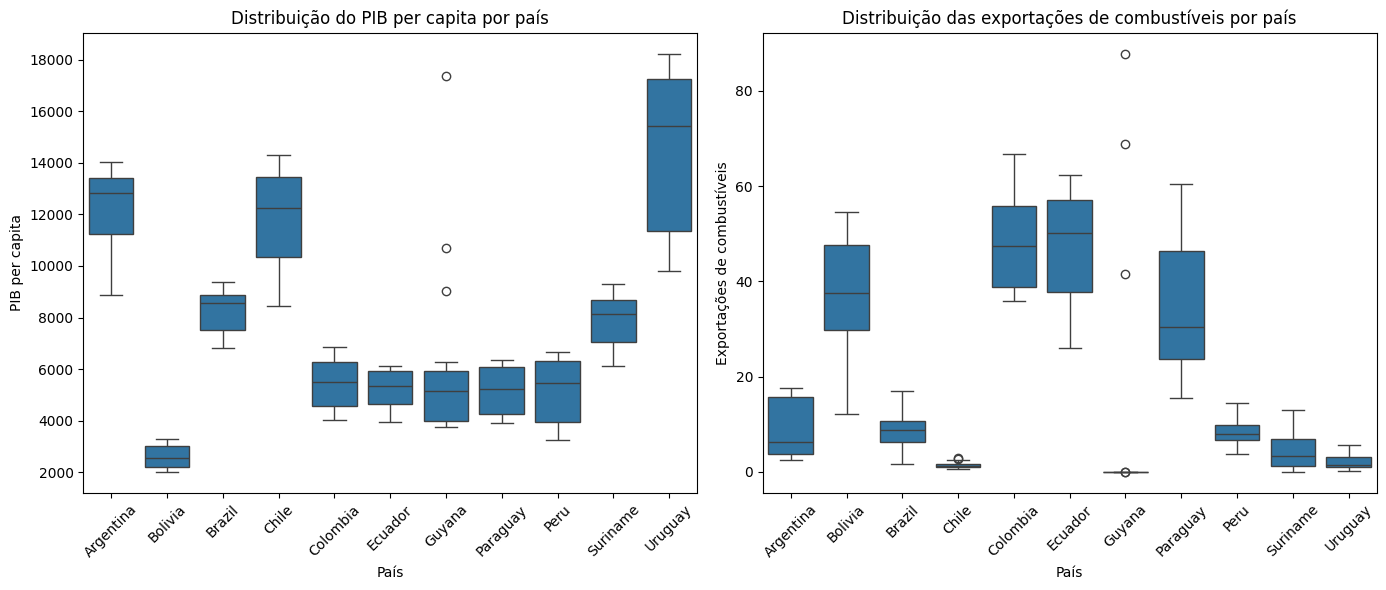

In [11]:
# Criação de uma figura com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotar o gráfico de PIB na 1° coluna
sns.boxplot(data=df_data, x='País', y='PIB per capita', ax=ax1)
ax1.set_title('Distribuição do PIB per capita por país')
ax1.tick_params(axis='x', rotation=45)

# Plotar o Gráfico de exportações na 2° coluna
sns.boxplot(data=df_data, x='País', y='Exportações de combustíveis', ax=ax2)
ax2.set_title('Distribuição das exportações de combustíveis por país')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2.3. Relação temporal
Após analisar as distribuições, nosso próximo passo é investigar como os números evoluíram ao passar dos anos, de 2000 a 2022. Identificando padrão de crescimento, tendências e anomalias cronológicas.

* Evolução do PIB per capita (Heatmap): Utilizaremos um heatmap para termos uma visão geral de todo o dataset. O mapa de calor revela um clareamento gradual na maioria dos países, indicando um crescimento econômico. Mais uma vez, a Guiana nos chama a atenção saindo de pontos extremamente frios para quentes.
* Evolução do PIB per capita (Gráfico de facetas): Para termos mais informação de forma independentes sobre esses países, iremos criar um gráfico de faceta, que basicamente são gráficos de linha, porém, para cada um dos países. O gráfico reforça o crescimento econômicos dos países e a anomalia da Guiana, saindo de uma linha estável para uma trajetória praticamente vertical nos seus últimos anos.
* Evolução das exportações de combustíveis: Esse gráfico reforça a divisão de grupos que fizemos anteriormente, os países não dependentes possuem linhas que se mantêm planas e consistentes. Enquanto os países dependentes apresentam linhas em níveis maiores e com flutuações. Voltando os olhos a Guiana, o seu gráfico espelha de forma praticamente idêntica ao de PIB per capita, onde de repente sua linha dispara verticalmente, exatamente no mesmo período.



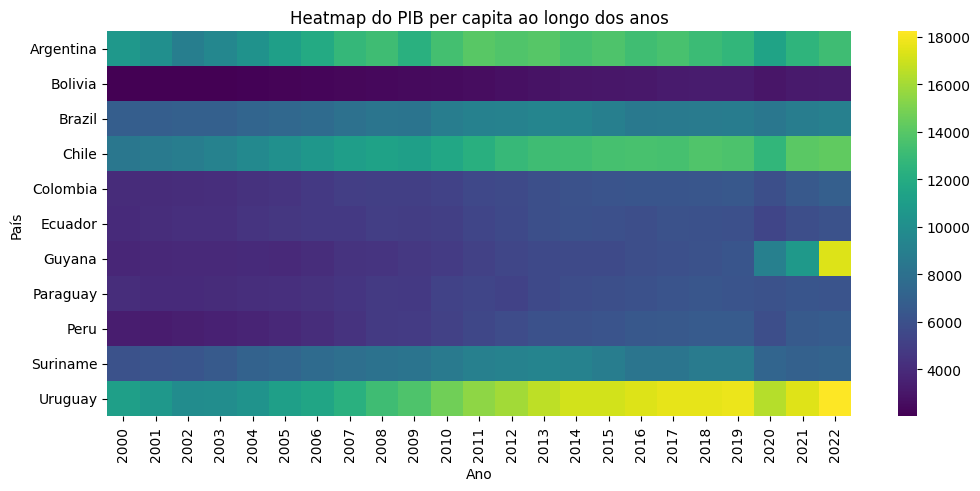

In [12]:
df_pivot = df_data.pivot(index='País', columns='Ano', values='PIB per capita')
plt.figure(figsize=(12, 5))
sns.heatmap(df_pivot, cmap='viridis')
plt.title('Heatmap do PIB per capita ao longo dos anos')
plt.show()

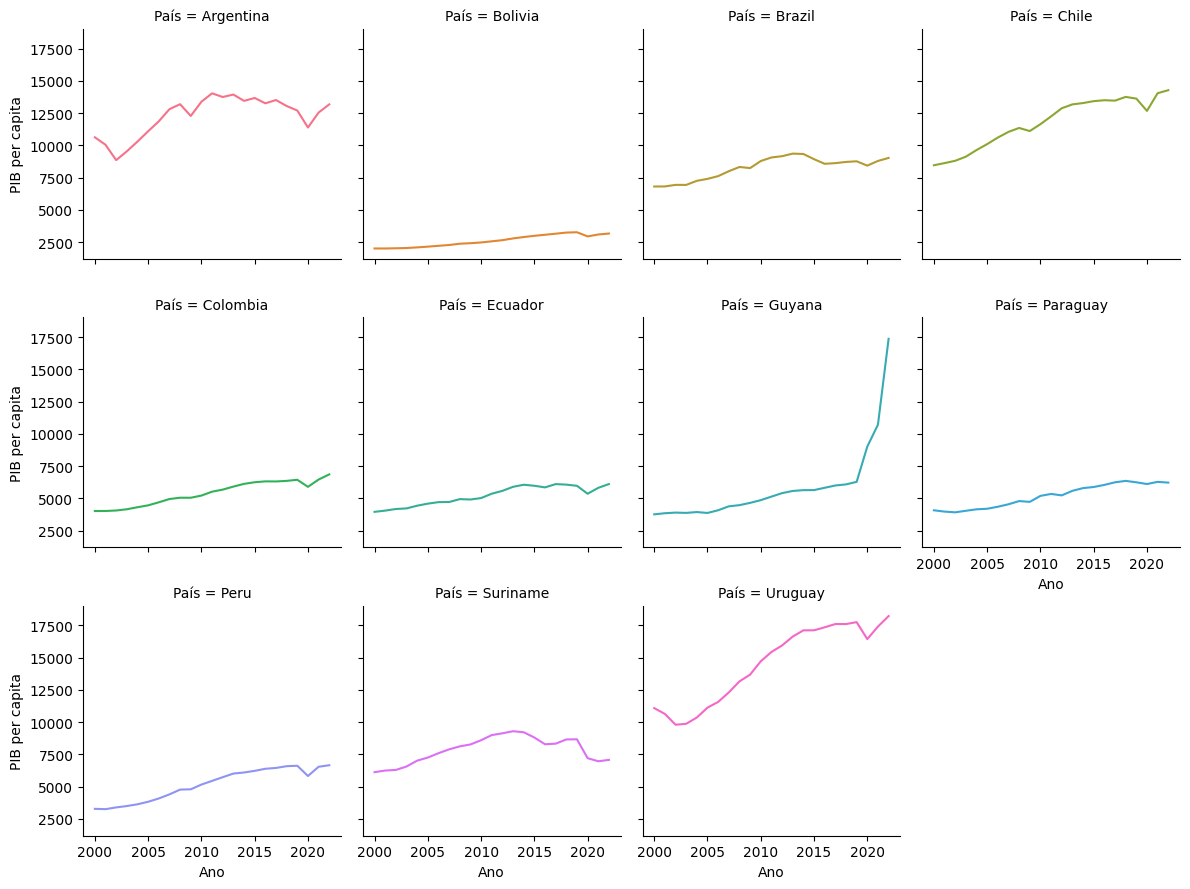

In [13]:
# Para evitar poluição do gráfico de linhas por conta do grande número de países, iremos utilizar o .relplot que criará um mini gráfico para cada um dos países.
sns.relplot(
    data=df_data,
    x='Ano', 
    y='PIB per capita',
    hue='País',
    kind='line',
    
    col='País', # Cria gráficos para cada país
    col_wrap=4, # Quebra de linha a cada 4 gráficos
    height=3, # Altura de cada mini-gráfico
    legend=False
)

plt.show()

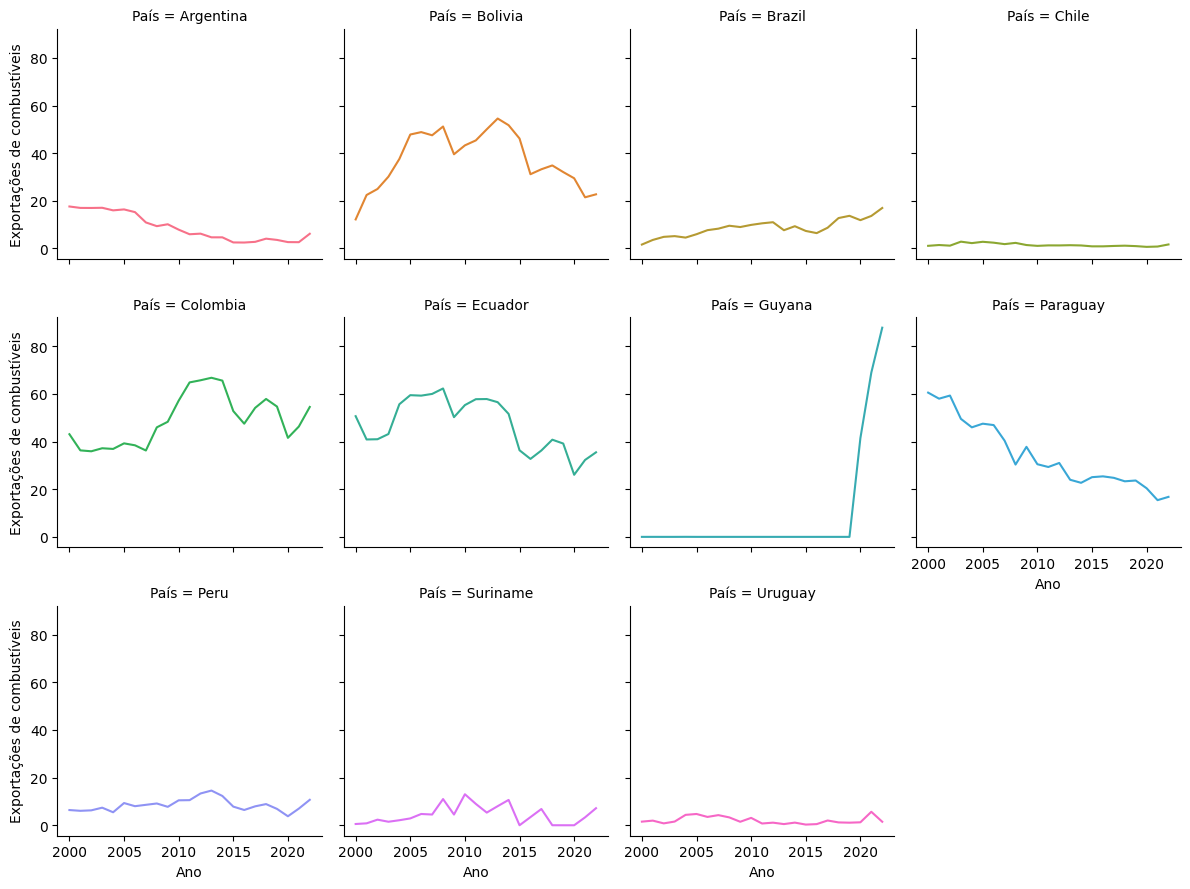

In [14]:
# Para evitar poluição do gráfico de linhas por conta do grande número de países, iremos utilizar o .relplot que criará um mini gráfico para cada um dos países.
sns.relplot(
    data=df_data,
    x='Ano', 
    y='Exportações de combustíveis',
    hue='País',
    kind='line',
    
    col='País', # Cria gráficos para cada país
    col_wrap=4, # Quebra de linha a cada 4 gráficos
    height=3, # Altura de cada mini-gráfico
    legend=False
)

plt.show()

## 2.4. Conclusão
Com a análise exploratória feita, conseguimos identificar padrões, anomalias e levantar questões para as fases seguintes. A principal descoberta dessa etapa é a coincidência visual na Guiana, onde o PIB per capita e as exportações de combustíveis, ambos historicamente estáveis, disparam verticalmente no mesmo período.

A nossa próxima seção de Visualização de dados será focada em responder o porquê esses disparos aconteceram.

# 3. Visualização dos dados
## 3.1. Pergunta 1: O que causou o avanço no PIB da Guiana?
* Hipótese: Esse avanço não é uma coincidência, mas um resultado direto do ínicio da exportação de combustíveis.
* Propósito: Essa casualidade é importante, pois: para investidores, sinaliza um novo mercado de alto crescimento na região e para economistas, a Guiana se tornará um estudo de caso em tempo real sobre como o país lidará com a dependência de um único recurso e como o seu crescimento se desenrolará com o passar dos anos.
* Visualização Gráfico de dipersão (Scatter Plot), para primeiramente provar correlação.

O gráfico de regressão prova que existe uma correlação positiva quase perfeita (R = 0.9352) entre as duas variáveis.

Estatiscamente, a correlação por si só não prova a causalidade, pois pode existir um terceiro fator que esteja ocasionando no impulso de PIB per capita e exportações de combustíveis, porém, o contexto externo nos fornece o veredito final:
1. Em 2015 foram encontradas reservas de petróleo gigantescas na costa da Guiana.
2. Em 2019 a produção e exportação desse petróleo tiveram início no final de 2019.

Conclusão: Nossos gráficos capturaram esse evento em tempo real. O grupo de pontos à esquerda, em 0%, representa a economia pré-petróleo da Guiana. Os três outros pontos (2020, 2021 e 2022) representam a nova economia pós-petróleo.

Portanto, a correlação altíssima, combinada com a evidência externa, nos permite concluir que o avanço no PIB per capita da Guiana foi, de fato, causado pelo início das exportações de combustíveis (petróleo).

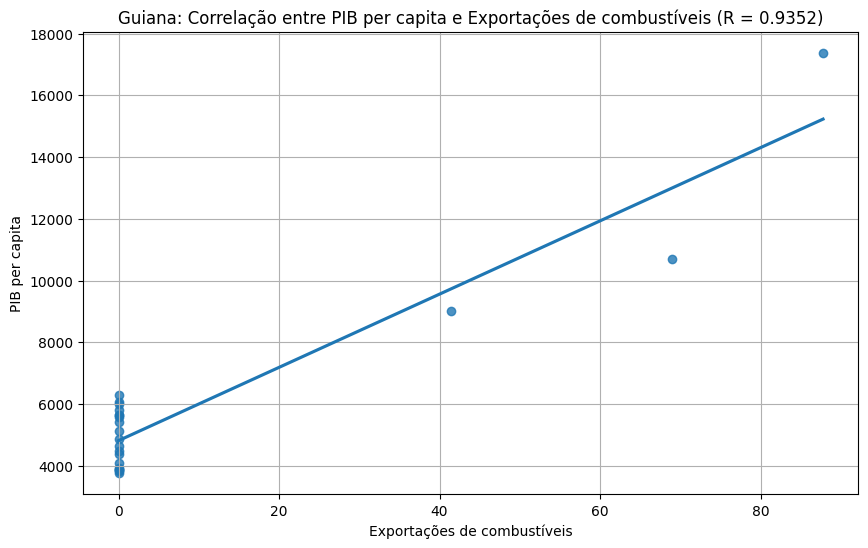

In [15]:
from scipy.stats import pearsonr

# Filtrar os dados apenas para Guiana
df_guyana = df_data[df_data['País'] == 'Guyana']

# Calcular o coeficiente de correlação (R de Pearson)
corr, _ = pearsonr(df_guyana['Exportações de combustíveis'], df_guyana['PIB per capita'])

# 3. Criar o Gráfico de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_guyana, 
    x='Exportações de combustíveis', 
    y='PIB per capita',
    ci=None
)

plt.title(f'Guiana: Correlação entre PIB per capita e Exportações de combustíveis (R = {corr:.4f})')
plt.xlabel('Exportações de combustíveis')
plt.ylabel('PIB per capita')
plt.grid(True)
plt.show()

## 3.2. Pergunta 2: Qual o impacto do "boom" da Guiana no ranking regional?
* Propósito: Provar que o crescimento da Guiana reorganizou o ranking econômico da América do Sul em apenas 3 anos.
* Visualização: Gráficos de barras lado a lado, comparando o antes (2019) e o depois (2022).

Conclusão: 
* No ranking de 2019 a Guiana era um país de baixa renda, com o 4° menor PIB per capita da região.
* No ranking de 2022 a Guiana salta para a 2° posição dos países de maior PIB per capita da região, ficando atrás apenas do Uruguai.

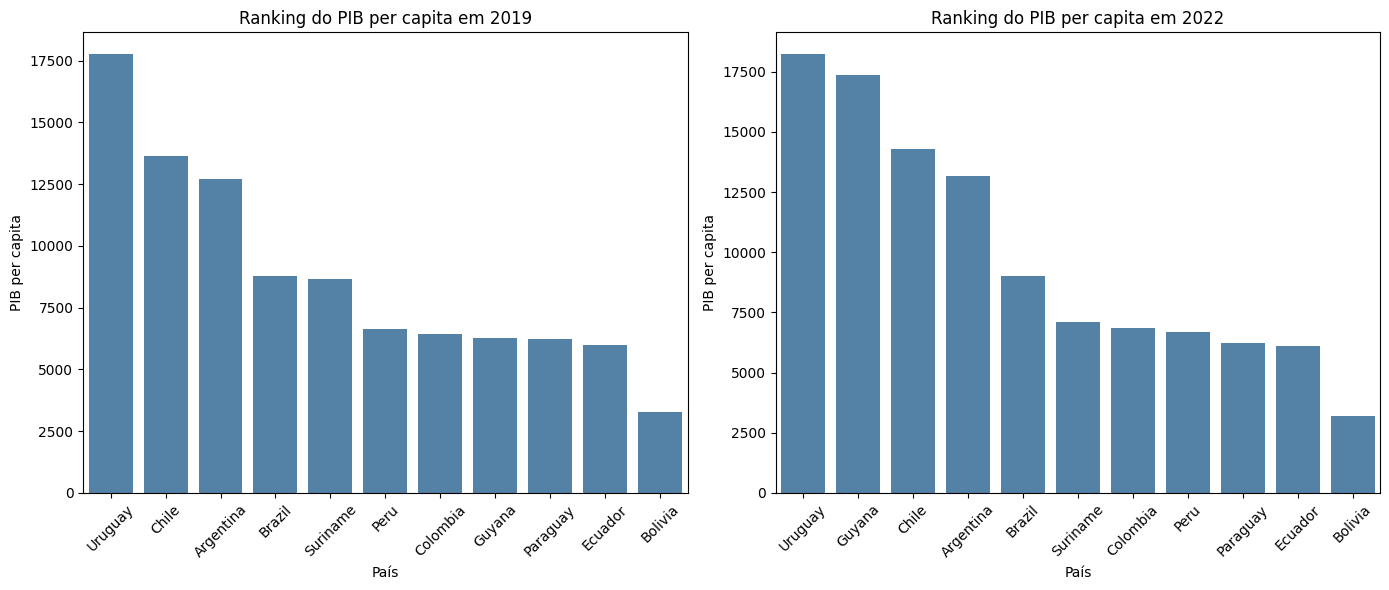

In [16]:
ano_antes = 2019
ano_depois = 2022

# Filtra e ordena os dados
df_antes = df_data[df_data['Ano'] == ano_antes].sort_values(by='PIB per capita', ascending=False)
df_depois = df_data[df_data['Ano'] == ano_depois].sort_values(by='PIB per capita', ascending=False)

# Criação de uma fígura com 1 linha e 2 colunas 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotar o ranking de 2019 na 1° coluna
sns.barplot(data=df_antes, x='País', y='PIB per capita', ax=ax1, color='steelblue')
ax1.set_title(f'Ranking do PIB per capita em {ano_antes}')
ax1.tick_params(axis='x', rotation=45)

# Plotar o ranking de 2022 na 2° coluna
sns.barplot(data=df_depois, x='País', y='PIB per capita', ax=ax2, color='steelblue')
ax2.set_title(f'Ranking do PIB per capita em {ano_depois}')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()